In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sns.set()
%matplotlib inline

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [35]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

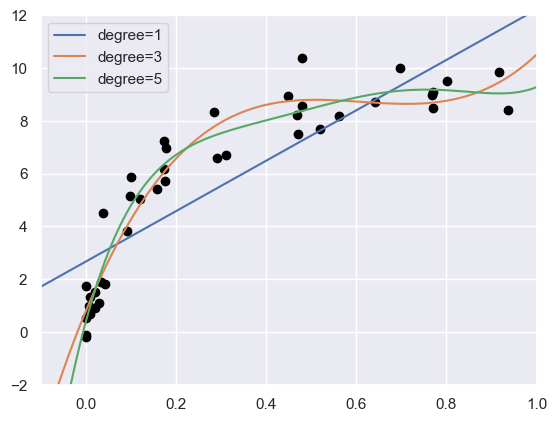

In [52]:
from sklearn.pipeline import Pipeline


X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [48]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

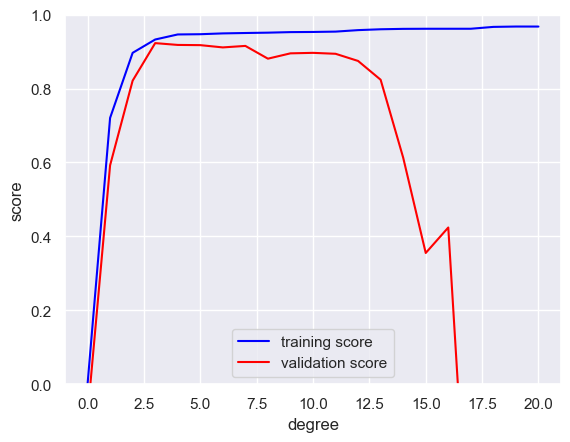

In [63]:
from sklearn.model_selection import validation_curve


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

poly_reg = PolynomialRegression()
degree = np.arange(0, 21)
train_score, val_score = validation_curve(poly_reg, X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

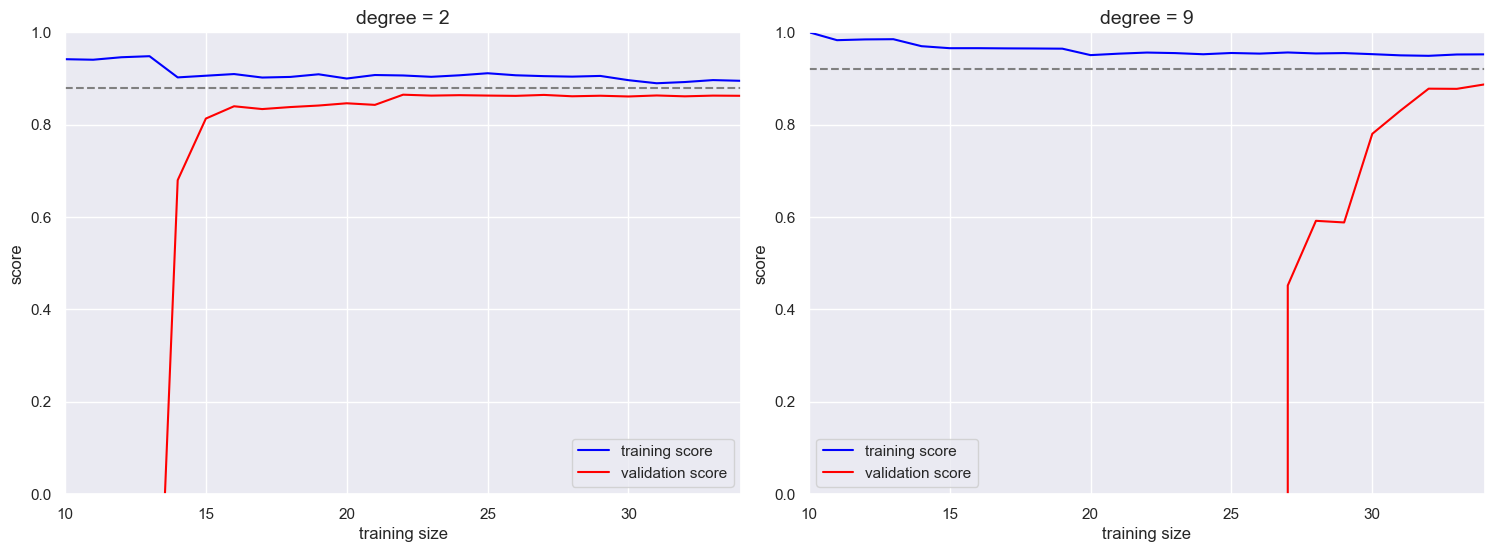

In [66]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

(10.0, 34.0)

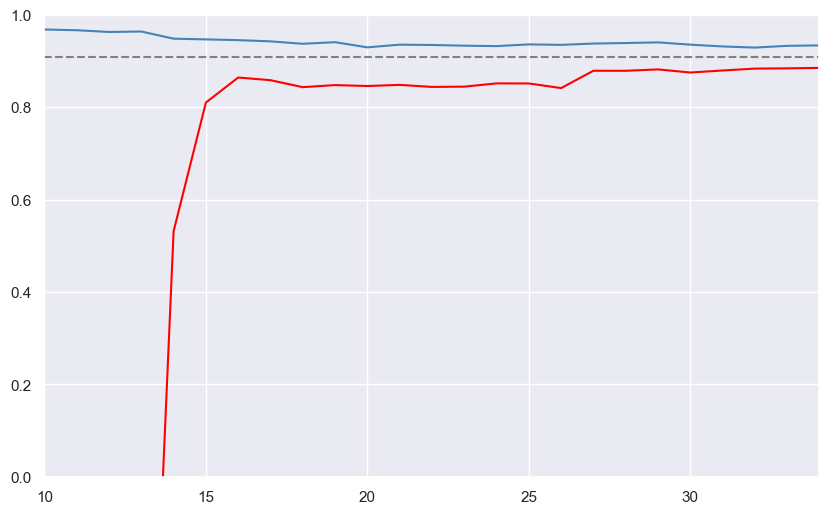

In [74]:
fig, ax = plt.subplots(figsize=(10,6))

N, train_lc, val_lc = learning_curve(PolynomialRegression(degree=3),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

ax.plot(N, np.mean(train_lc, 1), color='steelblue',
        label='Training score')
ax.plot(N, np.mean(val_lc, 1), color='red',
        label='Validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]),
          N[0], N[-1],
          color='gray', linestyle='dashed')

ax.set_ylim(0,1)
ax.set_xlim(N[0], N[-1])

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Input=[
    ('scale',StandardScaler()), ('poly',
    PolynomialFeatures(include_bias=False)), ('model',LinearRegression())
]

pipe = Pipeline(Input)

param = {
    'poly__degree': np.arange(21),
    'model__fit_intercept': [True, False],
#    'scale__with_mean': [True, False],
#    'scale__with_std': [True, False]
}

grid = GridSearchCV(pipe, param_grid=param, cv=7)

grid.fit(X, y);

c:\Users\matte\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
14 fits failed out of a total of 294.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\matte\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\matte\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\matte\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **f

In [82]:
grid.best_params_

{'model__fit_intercept': True, 'poly__degree': 4}